In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the selected device
print("Selected device:", device)

Selected device: cuda


In [3]:
# Define a transform to normalize the data
transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
     ]
    )


In [4]:
# Download the training set
datasset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Download the test set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 160225183.32it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43668238.58it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49685269.46it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3689103.17it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
datasset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [6]:
datasset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [7]:
train_loader = DataLoader(dataset=datasset,batch_size=32,shuffle=True)

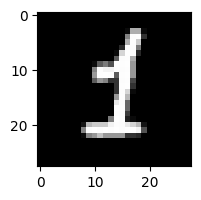

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(next(iter(train_loader))[0][0].permute((1,2,0)),cmap='gray')

In [9]:
from torch import nn
class Discriminator(nn.Module):
  def __init__(self,in_features):
    super().__init__()
    self.disc = nn.Sequential(
        nn.Linear(in_features, 128),
        nn.LeakyReLU(0.01),
        nn.Linear(128,1),
        nn.Sigmoid()

    )

  def forward(self,x):
    return self.disc(x)

class Generator(nn.Module):
  def __init__(self,z_dim,img_dim):
    super().__init__()
    self.gen = nn.Sequential(

        nn.Linear(z_dim, 256),
        nn.LeakyReLU(0.02),
        nn.Linear(256,img_dim),
        nn.Tanh()

    )
  def forward(self,x):
    return self.gen(x)

In [30]:
z_dim = 64
image_dim = 28*28
disc = Discriminator(image_dim).to(device)
generator = Generator(z_dim,image_dim).to(device)
epochs = 100
batch_size = 32
fixed_noise = torch.rand(batch_size,z_dim).to(device)

In [31]:
optim_disc = torch.optim.Adam(disc.parameters(),lr=0.0003)
optim_grn = torch.optim.Adam(generator.parameters(),lr=0.0003)
# Both generator and discriminator use BCE loss
criterion = nn.BCELoss()

In [22]:
write_fake = SummaryWriter(f"log/fake")
write_real = SummaryWriter(f"log/real")
step = 0

Epoch : 0.0 Batch 0/1875 | loss D : 0.0000, Loss G : 21.3509


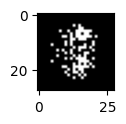

Epoch : 0.01 Batch 0/1875 | loss D : 0.0000, Loss G : 22.7458


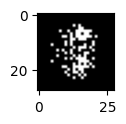

Epoch : 0.02 Batch 0/1875 | loss D : 0.0000, Loss G : 20.1817


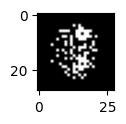

Epoch : 0.03 Batch 0/1875 | loss D : 0.0000, Loss G : 21.4076


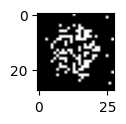

Epoch : 0.04 Batch 0/1875 | loss D : 0.0000, Loss G : 23.7892


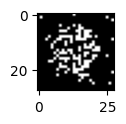

Epoch : 0.05 Batch 0/1875 | loss D : 0.0000, Loss G : 22.7723


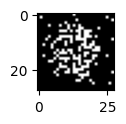

Epoch : 0.06 Batch 0/1875 | loss D : 0.0000, Loss G : 24.7600


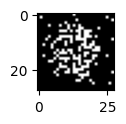

Epoch : 0.07 Batch 0/1875 | loss D : 0.0000, Loss G : 25.2780


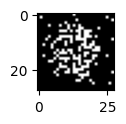

Epoch : 0.08 Batch 0/1875 | loss D : 0.0000, Loss G : 25.0983


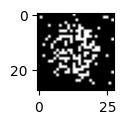

Epoch : 0.09 Batch 0/1875 | loss D : 0.0000, Loss G : 23.1630


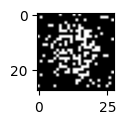

Epoch : 0.1 Batch 0/1875 | loss D : 0.0000, Loss G : 22.9248


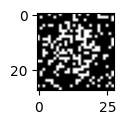

Epoch : 0.11 Batch 0/1875 | loss D : 0.0000, Loss G : 23.6629


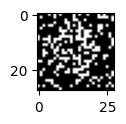

Epoch : 0.12 Batch 0/1875 | loss D : 0.0000, Loss G : 25.4986


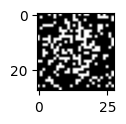

Epoch : 0.13 Batch 0/1875 | loss D : 0.0000, Loss G : 25.4196


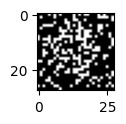

Epoch : 0.14 Batch 0/1875 | loss D : 0.0000, Loss G : 26.2487


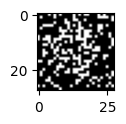

Epoch : 0.15 Batch 0/1875 | loss D : 0.0000, Loss G : 24.7794


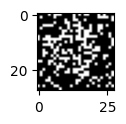

Epoch : 0.16 Batch 0/1875 | loss D : 0.0000, Loss G : 26.2492


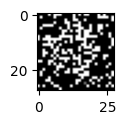

Epoch : 0.17 Batch 0/1875 | loss D : 0.0000, Loss G : 26.4617


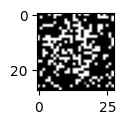

Epoch : 0.18 Batch 0/1875 | loss D : 0.0000, Loss G : 26.8231


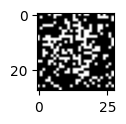

Epoch : 0.19 Batch 0/1875 | loss D : 0.0000, Loss G : 26.9375


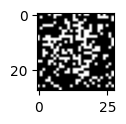

Epoch : 0.2 Batch 0/1875 | loss D : 0.0000, Loss G : 26.0082


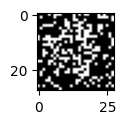

Epoch : 0.21 Batch 0/1875 | loss D : 0.0000, Loss G : 23.6029


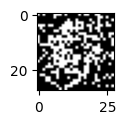

Epoch : 0.22 Batch 0/1875 | loss D : 0.0000, Loss G : 23.2619


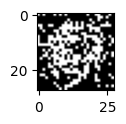

Epoch : 0.23 Batch 0/1875 | loss D : 0.0000, Loss G : 21.8523


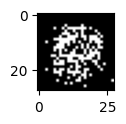

Epoch : 0.24 Batch 0/1875 | loss D : 0.0000, Loss G : 22.5416


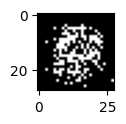

Epoch : 0.25 Batch 0/1875 | loss D : 0.0000, Loss G : 23.8892


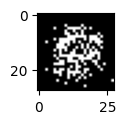

Epoch : 0.26 Batch 0/1875 | loss D : 0.0000, Loss G : 23.7069


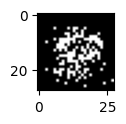

Epoch : 0.27 Batch 0/1875 | loss D : 0.0000, Loss G : 23.1927


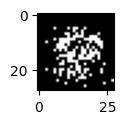

Epoch : 0.28 Batch 0/1875 | loss D : 0.0000, Loss G : 22.8879


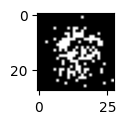

Epoch : 0.29 Batch 0/1875 | loss D : 0.0000, Loss G : 23.6372


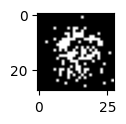

Epoch : 0.3 Batch 0/1875 | loss D : 0.0000, Loss G : 23.6852


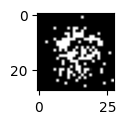

Epoch : 0.31 Batch 0/1875 | loss D : 0.0000, Loss G : 15.7320


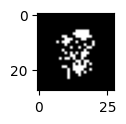

Epoch : 0.32 Batch 0/1875 | loss D : 0.0000, Loss G : 18.3167


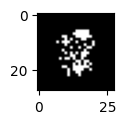

Epoch : 0.33 Batch 0/1875 | loss D : 0.0000, Loss G : 19.3749


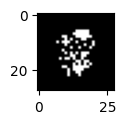

Epoch : 0.34 Batch 0/1875 | loss D : 0.0000, Loss G : 20.9796


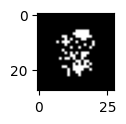

Epoch : 0.35 Batch 0/1875 | loss D : 0.0000, Loss G : 22.3437


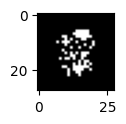

Epoch : 0.36 Batch 0/1875 | loss D : 0.0000, Loss G : 21.3124


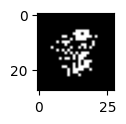

Epoch : 0.37 Batch 0/1875 | loss D : 0.0000, Loss G : 22.6634


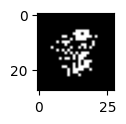

Epoch : 0.38 Batch 0/1875 | loss D : 0.0000, Loss G : 23.9580


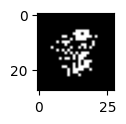

Epoch : 0.39 Batch 0/1875 | loss D : 0.0000, Loss G : 23.8421


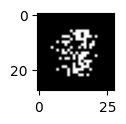

Epoch : 0.4 Batch 0/1875 | loss D : 0.0000, Loss G : 24.1363


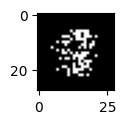

Epoch : 0.41 Batch 0/1875 | loss D : 0.0000, Loss G : 25.2094


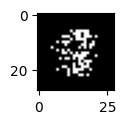

Epoch : 0.42 Batch 0/1875 | loss D : 0.0000, Loss G : 24.4449


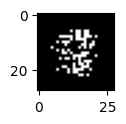

Epoch : 0.43 Batch 0/1875 | loss D : 0.0000, Loss G : 25.8296


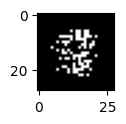

Epoch : 0.44 Batch 0/1875 | loss D : 0.0000, Loss G : 25.3683


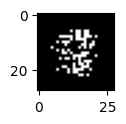

Epoch : 0.45 Batch 0/1875 | loss D : 0.0000, Loss G : 26.3808


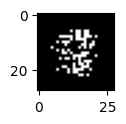

Epoch : 0.46 Batch 0/1875 | loss D : 0.0000, Loss G : 26.7024


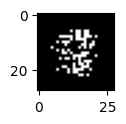

Epoch : 0.47 Batch 0/1875 | loss D : 0.0000, Loss G : 26.1888


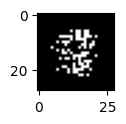

Epoch : 0.48 Batch 0/1875 | loss D : 0.0000, Loss G : 26.6235


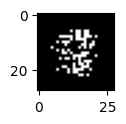

Epoch : 0.49 Batch 0/1875 | loss D : 0.0000, Loss G : 27.2553


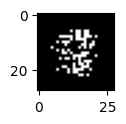

Epoch : 0.5 Batch 0/1875 | loss D : 0.0000, Loss G : 26.5058


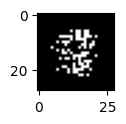

Epoch : 0.51 Batch 0/1875 | loss D : 0.0000, Loss G : 27.0699


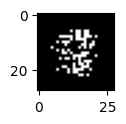

Epoch : 0.52 Batch 0/1875 | loss D : 0.0000, Loss G : 27.1459


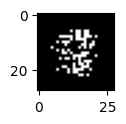

Epoch : 0.53 Batch 0/1875 | loss D : 0.0000, Loss G : 27.4748


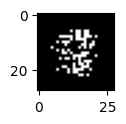

Epoch : 0.54 Batch 0/1875 | loss D : 0.0000, Loss G : 27.2773


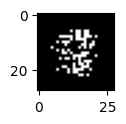

Epoch : 0.55 Batch 0/1875 | loss D : 0.0000, Loss G : 26.9652


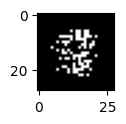

Epoch : 0.56 Batch 0/1875 | loss D : 0.0000, Loss G : 27.8319


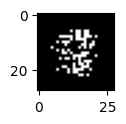

Epoch : 0.57 Batch 0/1875 | loss D : 0.0000, Loss G : 27.2345


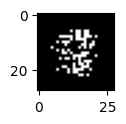

Epoch : 0.58 Batch 0/1875 | loss D : 0.0000, Loss G : 27.9291


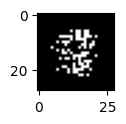

Epoch : 0.59 Batch 0/1875 | loss D : 0.0000, Loss G : 27.1438


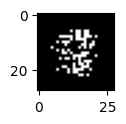

Epoch : 0.6 Batch 0/1875 | loss D : 0.0000, Loss G : 27.8892


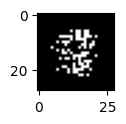

Epoch : 0.61 Batch 0/1875 | loss D : 0.0000, Loss G : 28.2028


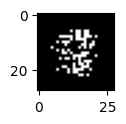

Epoch : 0.62 Batch 0/1875 | loss D : 0.0000, Loss G : 27.4586


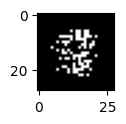

Epoch : 0.63 Batch 0/1875 | loss D : 0.0000, Loss G : 28.0128


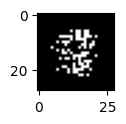

Epoch : 0.64 Batch 0/1875 | loss D : 0.0000, Loss G : 28.2717


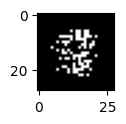

Epoch : 0.65 Batch 0/1875 | loss D : 0.0000, Loss G : 28.4386


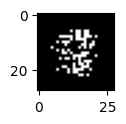

Epoch : 0.66 Batch 0/1875 | loss D : 0.0000, Loss G : 28.5625


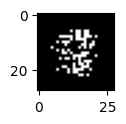

Epoch : 0.67 Batch 0/1875 | loss D : 0.0000, Loss G : 27.8079


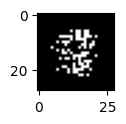

Epoch : 0.68 Batch 0/1875 | loss D : 0.0000, Loss G : 28.1589


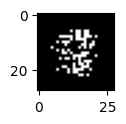

Epoch : 0.69 Batch 0/1875 | loss D : 0.0000, Loss G : 28.3610


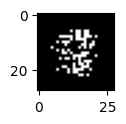

Epoch : 0.7 Batch 0/1875 | loss D : 0.0000, Loss G : 28.5037


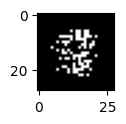

Epoch : 0.71 Batch 0/1875 | loss D : 0.0000, Loss G : 28.6144


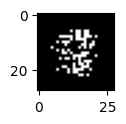

Epoch : 0.72 Batch 0/1875 | loss D : 0.0000, Loss G : 27.9023


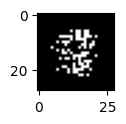

Epoch : 0.73 Batch 0/1875 | loss D : 0.0000, Loss G : 28.2073


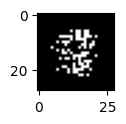

Epoch : 0.74 Batch 0/1875 | loss D : 0.0000, Loss G : 28.3934


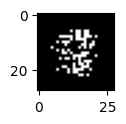

Epoch : 0.75 Batch 0/1875 | loss D : 0.0000, Loss G : 28.5280


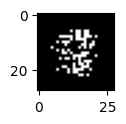

Epoch : 0.76 Batch 0/1875 | loss D : 0.0000, Loss G : 28.6335


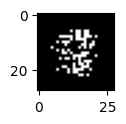

Epoch : 0.77 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7161


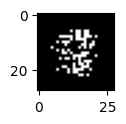

Epoch : 0.78 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7848


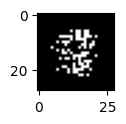

Epoch : 0.79 Batch 0/1875 | loss D : 0.0000, Loss G : 27.8203


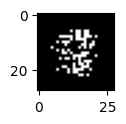

Epoch : 0.8 Batch 0/1875 | loss D : 0.0000, Loss G : 28.1622


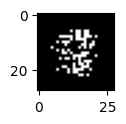

Epoch : 0.81 Batch 0/1875 | loss D : 0.0000, Loss G : 28.3624


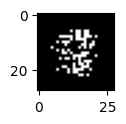

Epoch : 0.82 Batch 0/1875 | loss D : 0.0000, Loss G : 28.5046


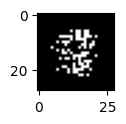

Epoch : 0.83 Batch 0/1875 | loss D : 0.0000, Loss G : 28.6151


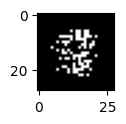

Epoch : 0.84 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7012


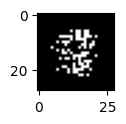

Epoch : 0.85 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7721


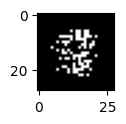

Epoch : 0.86 Batch 0/1875 | loss D : 0.0000, Loss G : 28.8341


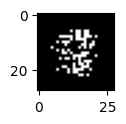

Epoch : 0.87 Batch 0/1875 | loss D : 0.0000, Loss G : 28.8889


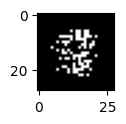

Epoch : 0.88 Batch 0/1875 | loss D : 0.0000, Loss G : 27.9487


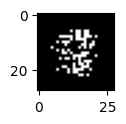

Epoch : 0.89 Batch 0/1875 | loss D : 0.0000, Loss G : 28.2299


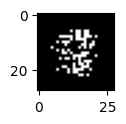

Epoch : 0.9 Batch 0/1875 | loss D : 0.0000, Loss G : 28.4079


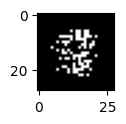

Epoch : 0.91 Batch 0/1875 | loss D : 0.0000, Loss G : 28.5388


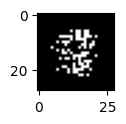

Epoch : 0.92 Batch 0/1875 | loss D : 0.0000, Loss G : 28.6420


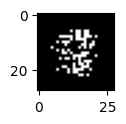

Epoch : 0.93 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7228


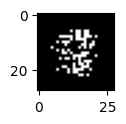

Epoch : 0.94 Batch 0/1875 | loss D : 0.0000, Loss G : 28.7907


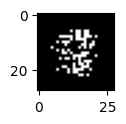

Epoch : 0.95 Batch 0/1875 | loss D : 0.0000, Loss G : 28.8504


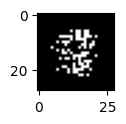

Epoch : 0.96 Batch 0/1875 | loss D : 0.0000, Loss G : 28.9037


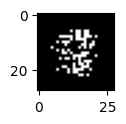

Epoch : 0.97 Batch 0/1875 | loss D : 0.0000, Loss G : 28.9515


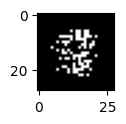

Epoch : 0.98 Batch 0/1875 | loss D : 0.0000, Loss G : 28.9944


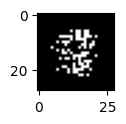

Epoch : 0.99 Batch 0/1875 | loss D : 0.0000, Loss G : 29.0345


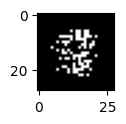

In [33]:

for epoch in range(epochs):
  for b,(real,_) in enumerate(train_loader):
    real = real.to(device)
    #flattein the 28,28 image....
    real = real.view(-1,784)


    #training discriminator
    noise = torch.rand(batch_size,z_dim).to(device)
    fake_image = generator(noise)
    # print(fake_image.shape)
    # print(real.shape)


    # real image is sent to Discriminator which outputs [32,1] beacuse of 32 batch size
    disc_real = disc(real).view(-1) # this view makes the shape into [32,1] = [32]
    # since we know that image is real so we send all one [32] shaped ones.
    lossD_real = criterion(disc_real, torch.ones_like(disc_real))

    # fake image is sent to Discriminator which outputs [32,1] beacuse of 32 batch size
    disc_fake = disc(fake_image).view(-1) # this view makes the shape into [32,1] = [32]
    # since we know that image is fake so we send all zeros [32] shaped ones.
    lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    lossD = (lossD_real + lossD_fake)/2
    disc.zero_grad()

    lossD.backward(retain_graph=True)
    optim_disc.step()


    # Training The Generator

    output = disc(fake_image).view(-1)
    lossG = criterion(output, torch.ones_like(output))
    generator.zero_grad()
    lossG.backward()
    optim_grn.step()

    if b == 0 :
      print(f"Epoch : {epoch/epochs} Batch {b}/{len(train_loader)} | loss D : {lossD:.4f}, Loss G : {lossG:.4f}")
      with torch.no_grad():
        fake = generator(fixed_noise).reshape(-1,1,28,28)
        data = real.reshape(-1,1,28,28)
        img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
        img_grid_real = torchvision.utils.make_grid(real, normalize=True)

        write_fake.add_image(
            'MNIST FAKE IMAGE',img_grid_fake,global_step = step
        )
        write_real.add_image(
            'MNIST REAL IMAGE',img_grid_real,global_step = step
        )
        step+=1
        plt.figure(figsize=(1,1))
        plt.imshow(fake[5].cpu().permute((1,2,0)),cmap='gray')
        plt.show()


In [18]:

for epoch in range(epochs):
  for b,(real,_) in enumerate(train_loader):
    real = real.to(device)
    print(real.shape)
    real = real.view(-1,784)
    print(real.shape)
    #training discriminator
    noise = torch.rand(batch_size,z_dim).to(device)
    print(noise.shape)
    fake_image = generator(noise)
    print(fake_image.shape)
    # print(fake_image.shape)
    # print(real.shape)

    disc_real = disc(real)
    print(disc_real.shape)
    disc_real = disc_real.view(-1)
    print(disc_real)
    lossD_real = criterion(disc_real, torch.ones_like(disc_real))
    break
  break

torch.Size([32, 1, 28, 28])
torch.Size([32, 784])
torch.Size([32, 64])
torch.Size([32, 784])
torch.Size([32, 1])
tensor([0.5304, 0.5239, 0.5046, 0.4461, 0.4955, 0.5439, 0.4709, 0.4841, 0.4524,
        0.5047, 0.4491, 0.5396, 0.5254, 0.5567, 0.5033, 0.4576, 0.4351, 0.4861,
        0.4736, 0.4134, 0.4618, 0.5137, 0.4670, 0.5515, 0.4610, 0.4832, 0.4751,
        0.5135, 0.5178, 0.5163, 0.4638, 0.5021], device='cuda:0',
       grad_fn=<ViewBackward0>)
